begin to train
grad acc 0.831767090474
NAG acc 0.847675204226
RMSProp acc 0.84706099134
AdaDelta acc 0.84749094036
Adam acc 0.847368097783


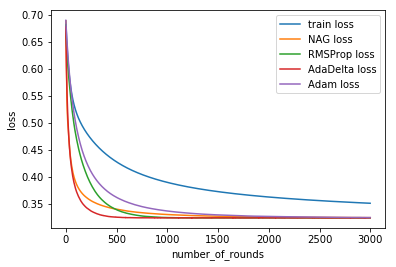

In [2]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randrange
import random
import numpy as np
from math import *

# logistic refression

def get_data(path,n_feature=None):
    data = ds.load_svmlight_file(path,n_features=n_feature)
    return data[0], data[1]
    
def sigmoid(z):
    s = 1/(1+np.exp(-z.A1))
    return s

def loss(X,y,w,lamb):
    N,dim = X.shape
    y[y!=1] = 0
    y = y.A1

    h = sigmoid(X*w)
    J = -y*np.log(h)-(1-y)*np.log(1-h)
    w_reg = w
    w_reg[0]=0
    return np.sum(J)/N + lamb/(2*N ) * (np.sum(w_reg.A**2))

def gradient(X,y,w,lamb):
    N,dim = X.shape

    y[y!=1] = 0
    y = y.A1
    hy = np.matrix(sigmoid(X*w)-y)
    dJ = X.T*(hy.T)/N
    w_reg = w
    w_reg[0] = 0
    g = dJ+w_reg*lamb/N
    return g
    
def predict(X,y,w):
    pred = np.dot(X,w)

    threshold =  len(y_test[(y_test==1).A1] ) / len(y_test[(y_test!=1).A1] )
    pred[pred>=threshold] = 1
    pred[pred<threshold] = 0
    acc = (pred==y).sum() / X.shape[0]
    return acc

def gradientDecent(X,y,w,alpha,lamb,num_rounds,X_test,y_test):
    train_loss_history = []
    val_loss_history = []

    for i in range(num_rounds):
        w = w - gradient(X,y,w,lamb)*alpha
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(X_test,y_test,w,lamb))
        
    return w,train_loss_history,val_loss_history

def NAG(X_train,y_train,w,alpha,lamb,num_rounds,X_test,y_test,batch_size=1000):
    train_loss_history = []
    test_loss_history = []

    yy = 0.9
    v = np.zeros(w.shape)
    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
        dx = X_train[random]
        dy = y_train[random]


        gt = gradient(dx,dy,w,lamb).A
        v = yy*v + alpha * gt
        w = w - v
        train_loss_history.append(loss(X_train,y_train,w,lamb))
        test_loss_history.append(loss(X_test,y_test,w,lamb))
    return w,train_loss_history,test_loss_history

def RMSProp(X_train,y_train,w,alpha,lamb,num_rounds,X_test,y_test,batch_size=1000):
    train_loss_history = []
    test_loss_history = []

    yy = 0.9
    Gt = np.zeros(w.shape)
    e = 1e-9
    gama = 0.001

    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
        dx = X_train[random]
        dy = y_train[random]


        gt = gradient(dx,dy,w,lamb).A
        Gt = yy * Gt + (1-yy) * (np.matrix( (gt)**2) )
        w = w - gama / np.sqrt(Gt+e).A * (gt)
        train_loss_history.append(loss(X_train,y_train,w,lamb))
        test_loss_history.append(loss(X_test,y_test,w,lamb))
    
    return w,train_loss_history,test_loss_history

def AdaDelta(X_train,y_train,w,alpha,lamb,num_rounds,X_test,y_test,batch_size=1000):
    train_loss_history = []
    test_loss_history = []

    yy = 0.95
    Gt = np.zeros(w.shape)
    e = 1e-6
    t = np.matrix(np.zeros(w.shape) )


    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
        dx = X_train[random]
        dy = y_train[random]


        gt = gradient(dx,dy,w,lamb).A
        Gt = yy * Gt + (1-yy) * (np.matrix( (gt)**2) )
        dw = - ( np.sqrt(t+e).A / np.sqrt(Gt+e).A ) * gt
        w = w + dw
        t = yy * t + (1-yy) * (np.matrix( (dw)**2) )
        
        train_loss_history.append(loss(X_train,y_train,w,lamb))
        test_loss_history.append(loss(X_test,y_test,w,lamb))
    
    return w,train_loss_history,test_loss_history


def Adam(X_train,y_train,w,alpha,lamb,num_rounds,X_test,y_test,batch_size=1000):
    train_loss_history = []
    test_loss_history = []
    beta1 = 0.85
    yy = 0.999
    m = np.zeros(w.shape)
    Gt = np.zeros(w.shape)
    gama = 1e-3
    e = 1e-8

    for i in range(num_rounds):

        random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
        dx = X_train[random]
        dy = y_train[random]


        gt = gradient(dx,dy,w,lamb).A
        m = beta1 * m + (1-beta1) * gt
        Gt = yy * Gt + (1-yy) * (np.matrix( (gt)**2) )
        alp = gama * np.sqrt(1-yy**(i+1) ) / (1-beta1**(i+1) )
        w = w - alp * m / np.sqrt(Gt + e)
        
        train_loss_history.append(loss(X_train,y_train,w,lamb))
        test_loss_history.append(loss(X_test,y_test,w,lamb))
    
    return w,train_loss_history,test_loss_history

   


def train(X,y,X_test,y_test):
    m = X.shape[1]
    init_w = np.matrix(np.zeros(m)).T
    print("begin to train")
    alpha=0.01
    num_rounds=3000
    lamb = 1
    batch_size=3000
    w,train_loss_history,grad_loss_history = gradientDecent(X,y,init_w,alpha,lamb,num_rounds,X_test,y_test)
    print('grad acc', predict(X_test,y_test,w))
    w,train_loss_history,NAG_loss_history = NAG(X,y,init_w,alpha,lamb,num_rounds,X_test,y_test,batch_size=batch_size)
    print('NAG acc', predict(X_test,y_test,w))
    w,train_loss_history,RMSProp_loss_history = RMSProp(X,y,init_w,alpha,lamb,num_rounds,X_test,y_test,batch_size=batch_size)
    print('RMSProp acc', predict(X_test,y_test,w))
    w,train_loss_history,AdaDelta_loss_history = AdaDelta(X,y,init_w,alpha,lamb,num_rounds,X_test,y_test,batch_size=batch_size)
    print('AdaDelta acc', predict(X_test,y_test,w))
    w,train_loss_history,Adam_loss_history = Adam(X,y,init_w,alpha,lamb,num_rounds,X_test,y_test,batch_size=batch_size)
    print('Adam acc', predict(X_test,y_test,w))
    plt.plot(np.arange(num_rounds),grad_loss_history,label='train loss')
    plt.plot(np.arange(num_rounds),NAG_loss_history,label='NAG loss')
    plt.plot(np.arange(num_rounds),RMSProp_loss_history,label='RMSProp loss')
    plt.plot(np.arange(num_rounds),AdaDelta_loss_history,label='AdaDelta loss')
    plt.plot(np.arange(num_rounds),Adam_loss_history,label='Adam loss')


    plt.legend(loc=1)
    plt.xlabel('number_of_rounds')
    plt.ylabel('loss')
    plt.show()
    return w   

X_train,y_train = get_data('a9a.txt')
X_train = X_train.toarray()
X_train = np.insert(X_train,0,values=1,axis=1)
X_train = np.matrix(X_train)
y_train = np.matrix(y_train).T


X_test,y_test = get_data('a9a.t',n_feature=123)
X_test = X_test.toarray()
X_test = np.insert(X_test,0,values=1,axis=1)
X_test = np.matrix(X_test)
y_test = np.matrix(y_test).T


w = train(X_train,y_train,X_test,y_test)

